<a href="https://colab.research.google.com/github/rafaeloliveiralopes/mnist-cnn-classifier/blob/main/number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rede Neural Convolucional (CNN) para classificação de imagens**

Este processo será dividido em cinco etapas:

1. Processamento da imagem;
2. Preparação dos dados
3. Construção do modelo;
4. Treinamento do modelo;
5. Inferência do modelo.

---



## **1 - Processamento da imagem**

In [1]:
# Imports the MNIST dataset for handwritten digit recognition.
# The dataset is already split into training and test sets.
from tensorflow.keras.datasets import mnist

In [2]:
# Splits the training and test vectors
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Prints the image dimensions and the number of labels in training and test data
print("\n")
print("Dimensão do X de treino:" + str(x_train[0].shape))
print("Rótulos y:" + str(y_train.shape))
print("\n")
print("Dimensão do X de teste:" +str(x_test[0].shape))
print("Rótulos:" + str(y_test.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Dimensão do X de treino:(28, 28)
Rótulos y:(60000,)


Dimensão do X de teste:(28, 28)
Rótulos:(10000,)


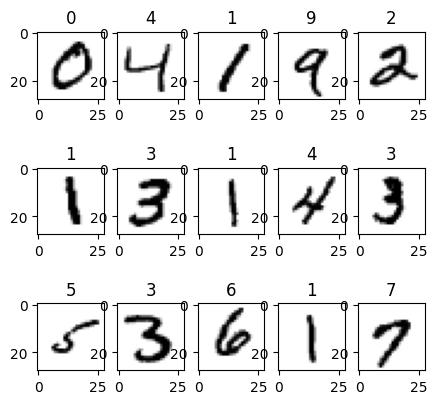

In [3]:
# Imports the Matplotlib library for visualization
import matplotlib.pyplot as plt

# Create figure and change size
figure = plt.figure(figsize = (5, 5))

# Define the number of images for visualization
num_of_img = 15
# Iterate up to 15
for index in range(1, num_of_img + 1):
  # Organizes the display into 3 rows and 5 columns
  plt.subplot(3, 5, index).set_title(f'{y_train[index]}')
  plt.axis('on')
  plt.imshow(x_train[index], cmap = 'gray_r')

## **2 - Preparação dos dados**

Na fase de preparação dos dados para um formato conveniente para arquitetura da rede, será adicionado mais uma dimensão e os valores serão normalzados em uma faixa que vai de 0 até 1 para facilitar a convergência do treino.

Em resumo, essas duas linhas estão obtendo as dimensões (altura e largura) da primeira imagem no conjunto de treinamento x_train e armazenando esses valores nas variáveis linhas e colunas, respectivamente. Isso é útil para saber as dimensões das imagens com as quais estão sendo trabalhadas, o que é importante para as etapas futuras de preparação dos dados e construção do modelo.

In [4]:
# Save the number of rows and columns
linhas = x_train[0].shape[0]
colunas = x_train[0].shape[1]

In [5]:
# Formats the input correctly for Keras
x_train = x_train.reshape(x_train.shape[0], linhas, colunas, 1)
x_test = x_test.reshape(x_test.shape[0], linhas, colunas, 1)

# Saves the input format that will be used later
input_shape = (linhas, colunas, 1)

# Convert the pixel values of the images to the float32 type
# This is necessary to perform data normalization later
# (division by 255), which helps the model training converge
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizes the data between 0 and 1 to facilitate training
x_train /= 255.0
x_test /= 255.0

# Import 'to_categorical' to convert the labels to one-hot encoding format
from tensorflow.keras.utils import to_categorical

# Transforms the categorical response into an encoded vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Obs 1:** Embora **float64** ofereça maior precisão e uma faixa numérica maior, esses benefícios geralmente não são necessários para o treinamento de redes neurais e vêm com desvantagens significativas em termos de uso de recursos e velocidade. Portanto, **float32** se tornou o padrão para a maioria das tarefas de aprendizado profundo, levando em conta eficiência de memória, velocidade computacional, precisão sufciente para treinamento a maioria do treinamento de machine learning e compatibilidade com hardwares e bibliotecas.

## **3 - Construção (configuração) do modelo**


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Define the number of classes (0-9 digits)
num_classes = 10

# Create the sequential model
model = Sequential()

# Adds a convolutional layer with 64 filters
# This layer will recognize patterns in the images
# The activation function defines the layer's output
model.add(Conv2D(64, kernel_size = (3, 3 ), activation = 'relu',
                 input_shape = input_shape))

# Adds a second convolutional layer with 128 filters
# This layer will learn to detect more complex patterns by combining
# the features from the previous layer.
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))

# Uses MaxPooling to simplify the network's output
model.add(MaxPooling2D(pool_size=(2, 2)))
# Reshapes the dimension to fit the output
model.add(Flatten())

# Output dense layer for classification based on the number of classes
model.add(Dense(num_classes, activation = 'softmax'))

# Loss function for classification 'categorical_crossentropy'
# Optimization algorithm Adam and metric accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(0.0005), metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **4 - Treinamento do modelo**

In [7]:
# Defines the number of samples to present in each epoch
batch_size = 128
# Defines the number of epochs
epochs = 10

# Trains the model using the fit function
# Passes the training set (x_train, y_train)
# Validates on the test set 'validation_data = (x_test, y_test)'
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 424s 899ms/step - accuracy: 0.8514 - loss: 0.5147 - val_accuracy: 0.9795 - val_loss: 0.0692
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 429s 873ms/step - accuracy: 0.9809 - loss: 0.0656 - val_accuracy: 0.9841 - val_loss: 0.0450
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 446s 882ms/step - accuracy: 0.9866 - loss: 0.0433 - val_accuracy: 0.9840 - val_loss: 0.0494
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 439s 877ms/step - accuracy: 0.9906 - loss: 0.0327 - val_accuracy: 0.9877 - val_loss: 0.0364
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 411s 876ms/step - accuracy: 0.9916 - loss: 0.0284 - val_accuracy: 0.9878 - val_loss: 0.0374
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 432s 854ms/step - accuracy: 0.9931 - loss: 0.0223 - val_accuracy: 0.9876 - val_loss: 0.0413
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 410s 873ms/step - accuracy: 0.9947 - loss: 0.0183 - val_accuracy: 0.9872 - val_loss: 0.0407
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 439s 867ms/step - accuracy: 0.9963 -

## **5 - Inferência do modelo**

O modelo criado deve ser testado com o objetivo de garantir que o comportamento seja semelhante em imagens novas e desconhecidas pela rede; esta fase também é chamada de inferência do modelo. Ademais, a divisão dos conjuntos é fundamental, para isso, é necessário reservar uma parcela ou duas (validação e teste) das amostras para averiguar a capacidade de generalização da arquitetura implementada.

<Figure size 640x480 with 0 Axes>

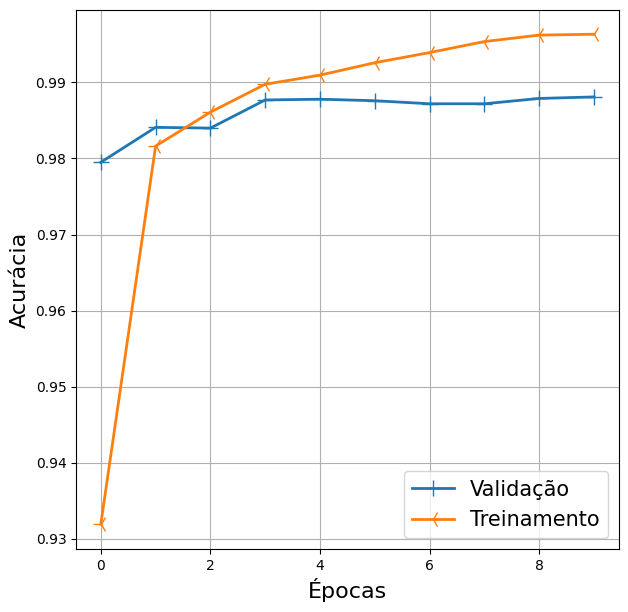

In [8]:
# Uses the object with saved results
history_dict = history.history

# Creates an array with the number of epochs for plotting
# Get the actual number of trained epochs from the length of one of the metric lists
num_epochs_trained = len(history_dict['accuracy'])
epochs_for_plot = range(0, num_epochs_trained)

figure = plt.figure()
plt.figure(figsize = (7, 7))

# Plot using the correct epochs array
line1 = plt.plot(epochs_for_plot, history_dict['val_accuracy'], label = 'Validação')
line2 = plt.plot(epochs_for_plot, history_dict['accuracy'], label = 'Treinamento')

plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 12.0)
plt.setp(line2, linewidth = 2.0, marker = '3', markersize = 12.0)
plt.xlabel('Épocas', fontsize= 16)
plt.ylabel('Acurácia', fontsize= 16)
plt.grid(True)
plt.legend(prop={'size': 15})
plt.show()